In [56]:
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Task 3: Classification and Association Rule Mining

## Part A: Classification

### Loading the CSV files

In [57]:
X_train_scaled = pd.read_csv(r"data\X_train.csv")
X_test_scaled = pd.read_csv(r"data\X_test.csv")
y_train_encoded = pd.read_csv(r"data\y_train.csv").values.ravel()  # flatten to 1D
y_test_encoded = pd.read_csv(r"data\y_test.csv").values.ravel()




### Decision Tree Classifier

In [58]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train_encoded)

# Predictions
y_pred_dt = dt_clf.predict(X_test_scaled)



### Metrics

In [59]:
print("\n=== Decision Tree Metrics ===")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_dt))
print("Precision:", precision_score(y_test_encoded, y_pred_dt, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_encoded, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test_encoded, y_pred_dt, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_dt))


=== Decision Tree Metrics ===
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Visualize Tree

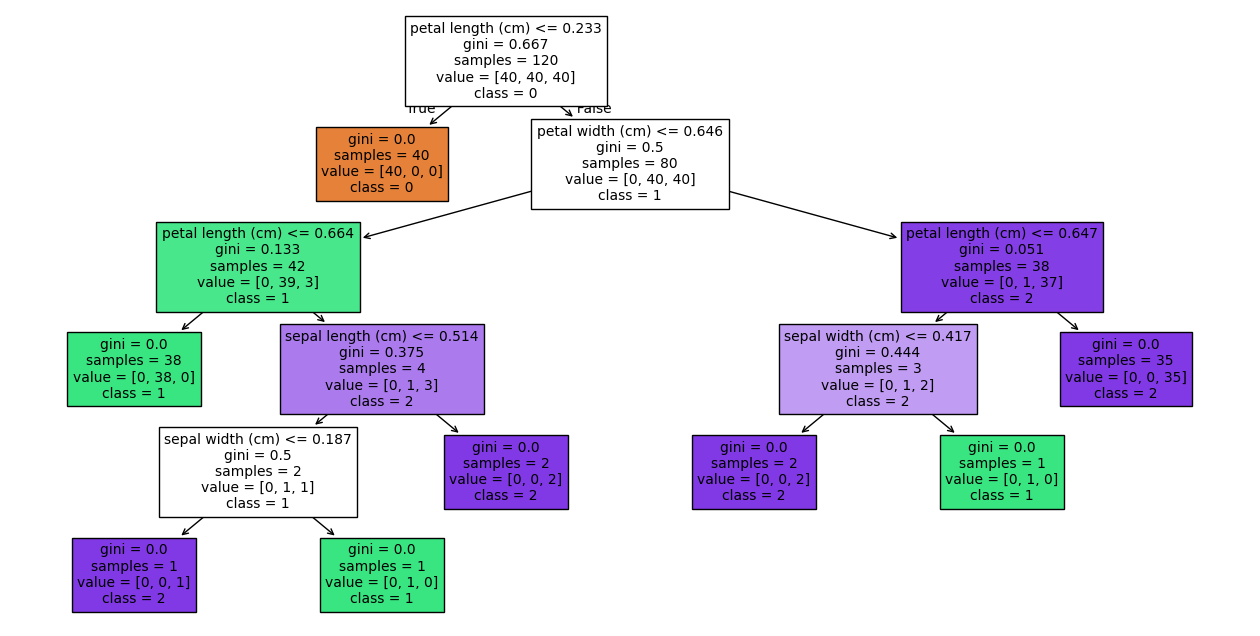

In [60]:
plt.figure(figsize=(16,8))
plot_tree(dt_clf, filled=True, feature_names=X_train_scaled.columns, class_names=[str(c) for c in set(y_train_encoded)], fontsize=10)
plt.show()

- Orange box (class 0) → Setosa
- Green boxes (class 1) → Versicolor
- Purple boxes (class 2) → Virginica

- Reading the visual
  - If petal length ≤ 0.233 cm, the flower is Setosa (perfect separation).

  - Otherwise, check petal width ≤ 0.646 cm — this begins separating Versicolor from Virginica.

  - So, applying this mapping to your decision tree:

Orange box (class 0) → Setosa

Green boxes (class 1) → Versicolor

Purple boxes (class 2) → Virginica

With this, the tree can now be read like this:

If petal length ≤ 0.233 cm, the flower is Setosa (perfect separation).

Otherwise, check petal width ≤ 0.646 cm — this begins separating Versicolor from Virginica.

Additional splits on sepal length and width further refine between Versicolor and Virginica.Additional splits on sepal length and width further refine between Versicolor and Virginica.

### KNN Classifier (k=5)

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train_encoded)

# Predictions
y_pred_knn = knn_clf.predict(X_test_scaled)




In [62]:
# Metrics
print("\n=== KNN (k=5) Metrics ===")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_knn))
print("Precision:", precision_score(y_test_encoded, y_pred_knn, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_encoded, y_pred_knn, average='weighted'))
print("F1-score:", f1_score(y_test_encoded, y_pred_knn, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_knn))



=== KNN (k=5) Metrics ===
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1-score: 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Comparing Performance of the DecisionTree Classifier and KNN (k=5)

In [64]:

acc_dt = accuracy_score(y_test_encoded, y_pred_dt)
acc_knn = accuracy_score(y_test_encoded, y_pred_knn)

print("Accuracy for the Decision Tree Classifier",acc_dt)
print("Accuracy for the KNN",acc_knn)
if acc_dt > acc_knn:
    print("\nDecision Tree performed better in terms of accuracy.")
elif acc_knn > acc_dt:
    print("\nKNN performed better in terms of accuracy.")
else:
    print("\nBoth classifiers achieved the same accuracy.")

Accuracy for the Decision Tree Classifier 0.9333333333333333
Accuracy for the KNN 0.9666666666666667

KNN performed better in terms of accuracy.


## Part B: Association Rule Mining

####  Generating synthetic transactional data

In [65]:
random.seed(42)

items_pool = [
    'milk', 'bread', 'beer', 'diapers', 'eggs', 'butter', 'apples', 'bananas',
    'cheese', 'yogurt', 'juice', 'chocolate', 'coffee', 'tea', 'rice', 'pasta',
    'tomatoes', 'onions', 'chips', 'soda'
]

n_transactions = random.randint(20, 50)  # between 20 and 50 transactions
transactions = []

for _ in range(n_transactions):
    basket_size = random.randint(3, 8)  # 3–8 items per transaction
    basket = random.sample(items_pool, basket_size)
    
    # Add some patterns manually to simulate co-occurrences
    if 'milk' in basket and 'bread' not in basket:
        basket.append('bread')
    if 'beer' in basket and 'diapers' not in basket:
        basket.append('diapers')
    
    transactions.append(basket)

print("Sample transactions:", transactions[:5])


Sample transactions: [['milk', 'cheese', 'bananas', 'bread'], ['eggs', 'diapers', 'onions', 'beer'], ['tea', 'bread', 'milk', 'beer', 'apples', 'diapers', 'cheese'], ['milk', 'onions', 'apples', 'tea', 'bananas', 'pasta', 'yogurt', 'bread'], ['milk', 'butter', 'tea', 'juice', 'cheese', 'bread']]


### Encoding data for Apriori

In [66]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

### Applying the Apriori Algorithm

In [67]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sorting by lift and get top 5
top_rules = rules.sort_values(by="lift", ascending=False).head(5)
print("\nTop 5 rules sorted by lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Top 5 rules sorted by lift:
           antecedents         consequents  support  confidence      lift
14              (milk)             (bread)     0.20    1.000000  2.666667
13             (bread)              (milk)     0.20    0.533333  2.666667
16          (tomatoes)            (cheese)     0.20    1.000000  2.105263
23  (diapers, bananas)              (beer)     0.25    0.909091  1.818182
25              (beer)  (diapers, bananas)     0.25    0.500000  1.818182


### Analyzing one rule

In [68]:
if not top_rules.empty:
    rule = top_rules.iloc[0]
    print("\nExample Rule Analysis:")
    print(f"When customers buy {list(rule['antecedents'])}, they also tend to buy {list(rule['consequents'])}.")
    print(f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f}")
    print("Implication: This suggests a strong association \nRecommendation :Placing these items close together in-store or bundling them in promotions could boost sales.")




Example Rule Analysis:
When customers buy ['milk'], they also tend to buy ['bread'].
Support: 0.20, Confidence: 1.00, Lift: 2.67
Implication: This suggests a strong association 
Recommendation :Placing these items close together in-store or bundling them in promotions could boost sales.


### Save generated transactions to CSV

In [69]:
df_transactions = pd.DataFrame({'TransactionID': range(1, len(transactions)+1),
                                 'Items': [", ".join(basket) for basket in transactions]})

df_transactions.to_csv("data/synthetic_transactions.csv", index=False)

